In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import itertools
from matplotlib.ticker import ScalarFormatter
import mplfinance as mpf

In [2]:
df_raw = pd.read_csv('stock/HPG_data.csv')
df_raw['Date'] = pd.to_datetime(df_raw['Date'])
df_raw = df_raw.sort_values(by='Date')
df_raw.set_index('Date', inplace=True)
df_raw

,Ngay,Stock,GiaDieuChinh,GiaDongCua,GiaMoCua,GiaCaoNhat,GiaThapNhat,GiaThayDoi,ThayDoiPhanTram,ThayDoi,KhoiLuongKhopLenh,GiaTriKhopLenh,KLThoaThuan,GtThoaThuan
Date,,,,,,,,,,,,,,
2007-11-15,15/11/2007,HPG,2.40,127.00,130.00,130.0,109.00,0.00,0.00,0(0.00 %),1306330,164000000000,0,0
2007-11-16,16/11/2007,HPG,2.29,121.00,121.00,121.0,121.00,-6.00,-4.72,-6(-4.72 %),248510,30070000000,0,0
2007-11-19,19/11/2007,HPG,2.17,115.00,115.00,115.0,115.00,-6.00,-4.96,-6(-4.96 %),120480,13855000000,0,0
2007-11-20,20/11/2007,HPG,2.08,110.00,110.00,110.0,110.00,-5.00,-4.35,-5(-4.35 %),58710,6458000000,50000,5500000000
2007-11-21,21/11/2007,HPG,2.16,114.00,105.00,114.0,105.00,4.00,3.64,4(3.64 %),728080,78430000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-16,16/06/2025,HPG,26.75,26.75,26.35,27.0,26.35,0.35,1.33,0.35(1.33 %),29735100,793895030000,2250297,50948206200
2025-06-17,17/06/2025,HPG,26.85,26.85,26.90,27.1,26.75,0.10,0.37,0.1(0.37 %),26625600,716295425000,96200,2501200000
2025-06-18,18/06/2025,HPG,27.15,27.15,26.90,27.2,26.80,0.30,1.12,0.3(1.12 %),31468200,850427995000,1785000,2365000000


In [3]:
df_raw.columns

Index(['Ngay', 'Stock', 'GiaDieuChinh', 'GiaDongCua', 'GiaMoCua', 'GiaCaoNhat',
       'GiaThapNhat', 'GiaThayDoi', 'ThayDoiPhanTram', 'ThayDoi',
       'KhoiLuongKhopLenh', 'GiaTriKhopLenh', 'KLThoaThuan', 'GtThoaThuan'],
      dtype='object')

In [4]:
print(df_raw[['Ngay', 'GiaDieuChinh', 'GiaDongCua', 'GiaMoCua', 'GiaCaoNhat', 'GiaThapNhat']].head(4).to_latex(index=False, float_format="%.2f"))

\begin{tabular}{lrrrrr}
\toprule
Ngay & GiaDieuChinh & GiaDongCua & GiaMoCua & GiaCaoNhat & GiaThapNhat \\
\midrule
15/11/2007 & 2.40 & 127.00 & 130.00 & 130.00 & 109.00 \\
16/11/2007 & 2.29 & 121.00 & 121.00 & 121.00 & 121.00 \\
19/11/2007 & 2.17 & 115.00 & 115.00 & 115.00 & 115.00 \\
20/11/2007 & 2.08 & 110.00 & 110.00 & 110.00 & 110.00 \\
\bottomrule
\end{tabular}



In [5]:
df = df_raw.copy()

summary_stats = {
    " ": [
        "Mean",
        "Min",
        "Q1",
        "Median",
        "Q3",
        "Max",
        "Mode",
        "Var",
        "SD",
        "CV",
        "IQR"
    ]
}

quantitative_cols = [
    'GiaDieuChinh',
    'GiaDongCua',
    'ThayDoiPhanTram',
    'KhoiLuongKhopLenh'
]

def create_summary_df(df, quantitative_cols):
    for col in quantitative_cols:
        data = df[col]
        mean_val = data.mean()
        std_val = data.std()
        mode_val = data.mode().iloc[0] if not data.mode().empty else np.nan
        variance_val = data.var()
        cv_val = std_val / mean_val if mean_val != 0 else np.nan

        summary_stats[col] = [
            mean_val,
            data.min(),
            data.quantile(0.25),
            data.median(),
            data.quantile(0.75),
            data.max(),
            mode_val,
            variance_val,
            std_val,
            cv_val,
            data.quantile(0.75) - data.quantile(0.25)
        ]

    formatted_summary_df = pd.DataFrame(summary_stats).copy()

    for col in formatted_summary_df.columns[1:]:  # Skip "Thông số thống kê"
        formatted_summary_df[col] = formatted_summary_df[col].apply(lambda x: f'{x:,.4f}' if isinstance(x, (int, float)) else x)

    return formatted_summary_df

formatted_summary_df = create_summary_df(df, quantitative_cols)
formatted_summary_df = formatted_summary_df.applymap(lambda x: x.rstrip('0').rstrip('.') if isinstance(x, str) else x)
formatted_summary_df

C:\Users\PC\AppData\Local\Temp\ipykernel_53072\3105347116.py:57: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_summary_df = formatted_summary_df.applymap(lambda x: x.rstrip('0').rstrip('.') if isinstance(x, str) else x)


,,GiaDieuChinh,GiaDongCua,ThayDoiPhanTram,KhoiLuongKhopLenh
0,Mean,10.1627,37.4874,0.0599,"8,155,027.0712"
1,Min,0.68,12.1,-22.86,0
2,Q1,1.79,26.45,-1.11,"472,235"
3,Median,5.73,32.7,0,"2,542,830"
4,Q3,17.035,45.95,1.2425,"12,830,875"
5,Max,39.9,127,7,"99,658,800"
6,Mode,1.17,23,0,0
7,Var,104.3475,238.1792,5.284,"137,023,261,910,106.0312"
8,SD,10.2151,15.4331,2.2987,"11,705,693.5681"
9,CV,1.0051,0.4117,38.3627,1.4354


In [6]:
print(formatted_summary_df.to_latex(index=False, escape=False, float_format="%.4f"))

\begin{tabular}{lllll}
\toprule
  & GiaDieuChinh & GiaDongCua & ThayDoiPhanTram & KhoiLuongKhopLenh \\
\midrule
Mean & 10.1627 & 37.4874 & 0.0599 & 8,155,027.0712 \\
Min & 0.68 & 12.1 & -22.86 & 0 \\
Q1 & 1.79 & 26.45 & -1.11 & 472,235 \\
Median & 5.73 & 32.7 & 0 & 2,542,830 \\
Q3 & 17.035 & 45.95 & 1.2425 & 12,830,875 \\
Max & 39.9 & 127 & 7 & 99,658,800 \\
Mode & 1.17 & 23 & 0 & 0 \\
Var & 104.3475 & 238.1792 & 5.284 & 137,023,261,910,106.0312 \\
SD & 10.2151 & 15.4331 & 2.2987 & 11,705,693.5681 \\
CV & 1.0051 & 0.4117 & 38.3627 & 1.4354 \\
IQR & 15.245 & 19.5 & 2.3525 & 12,358,640 \\
\bottomrule
\end{tabular}



## Phân tích với các kỹ thuật thống kê

Biểu đồ giá đóng cửa của chỉ số VNINDEX theo thời gian

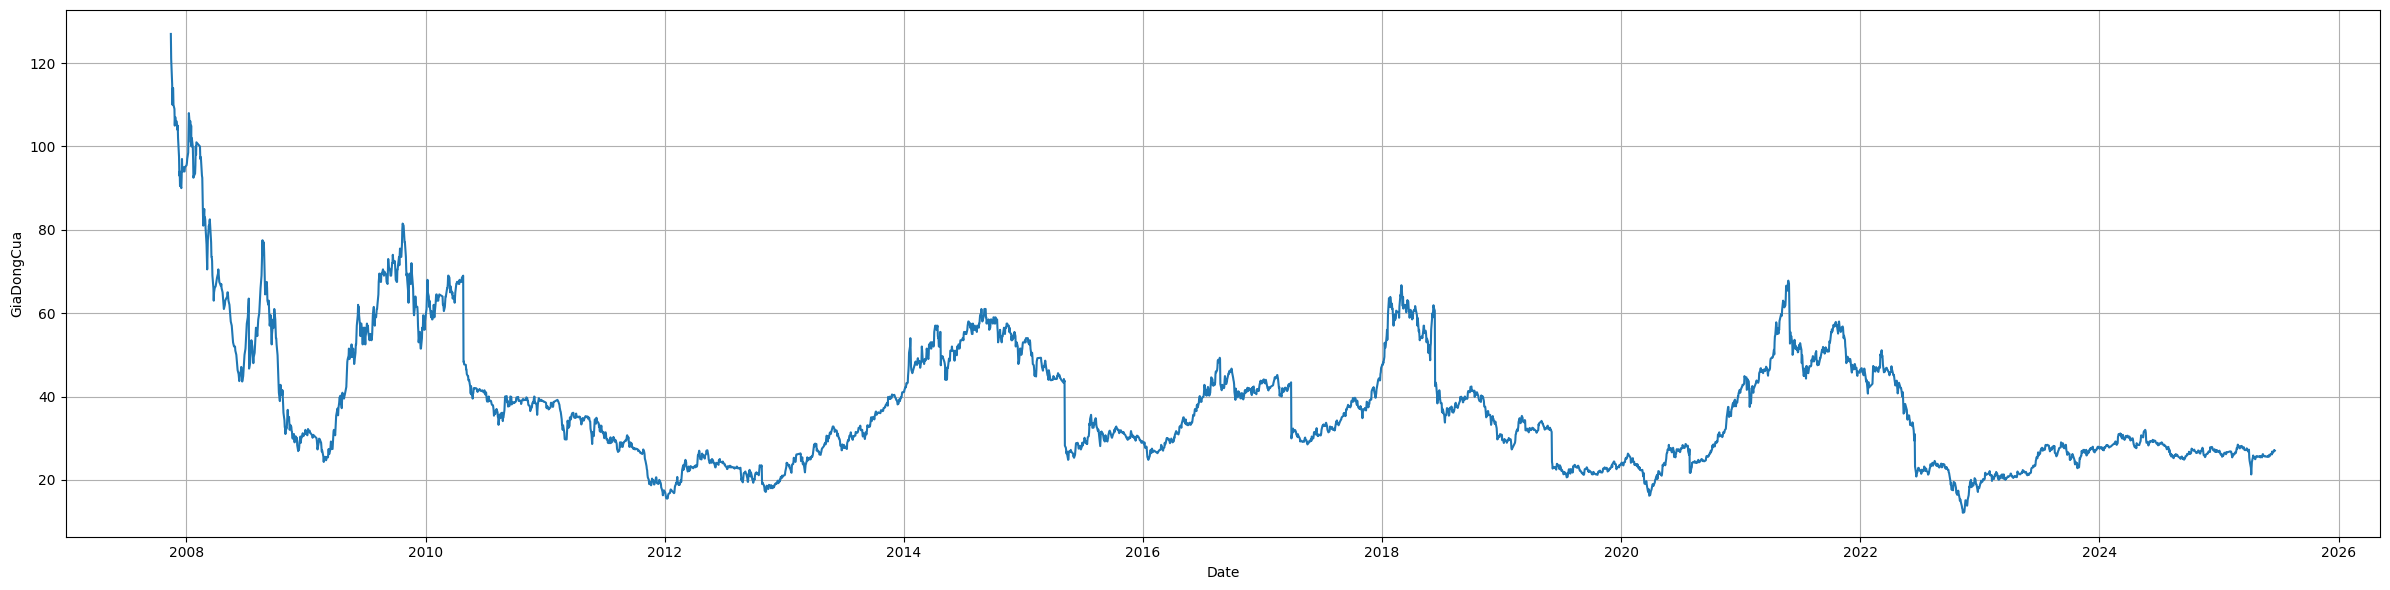

In [7]:
plt.figure(figsize=(24, 6))
plt.plot(df_raw.index, df_raw['GiaDongCua'], linestyle='-')
plt.xlabel('Date')
plt.ylabel('GiaDongCua')
plt.grid(True)
plt.tight_layout()
plt.show()

Biểu đồ nến 1 năm gần đây

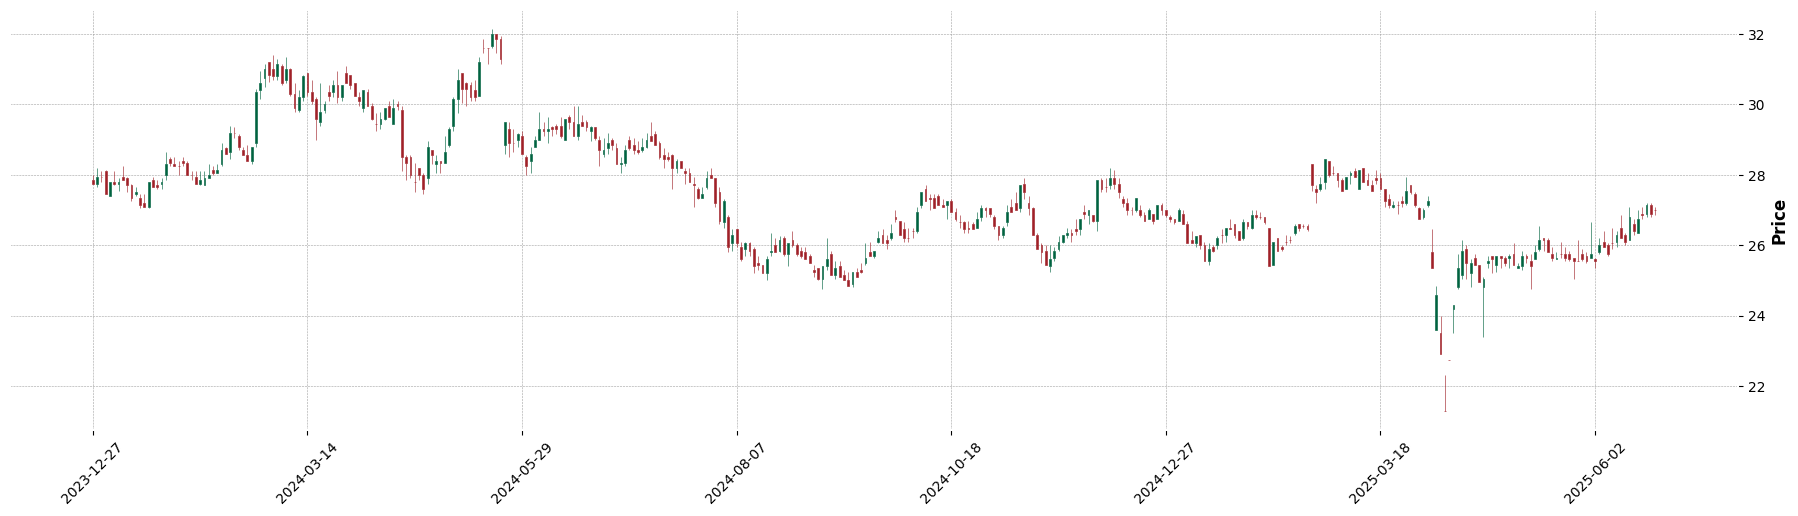

In [48]:
df_candle = df_raw[['GiaMoCua', 'GiaCaoNhat', 'GiaThapNhat', 'GiaDongCua']].tail(365).copy()
df_candle.columns = ['Open', 'High', 'Low', 'Close']
df_candle['Date'] = pd.to_datetime(df_candle.index)  # Convert to datetime
df_candle.set_index('Date', inplace=True)

mpf.plot(
    df_candle,
    type='candle',
    style='charles',
    ylabel='Price',
    volume=False,
    figsize=(24, 6),
    datetime_format='%Y-%m-%d'
)

Biểu đồ khối lượng giao dịch

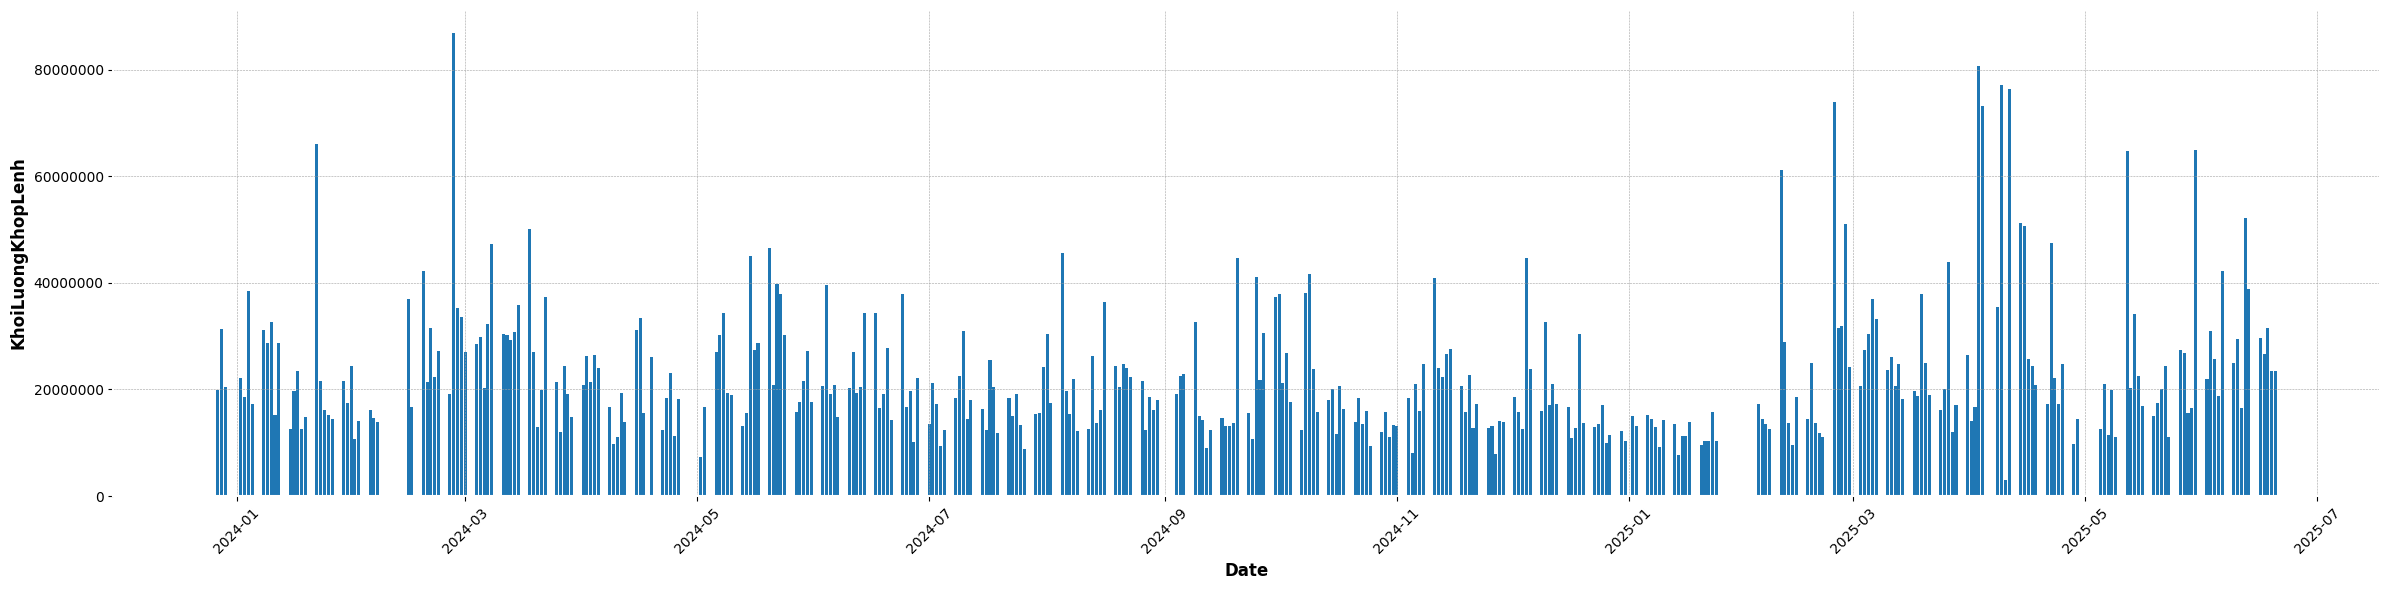

In [50]:
plt.figure(figsize=(24, 6))
plt.bar(df_raw[-365:].index, df_raw[-365:]['KhoiLuongKhopLenh'])
plt.xlabel('Date')
plt.ylabel('KhoiLuongKhopLenh')
plt.xticks(rotation=45)

plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()

Hộp điểm giá đóng cửa

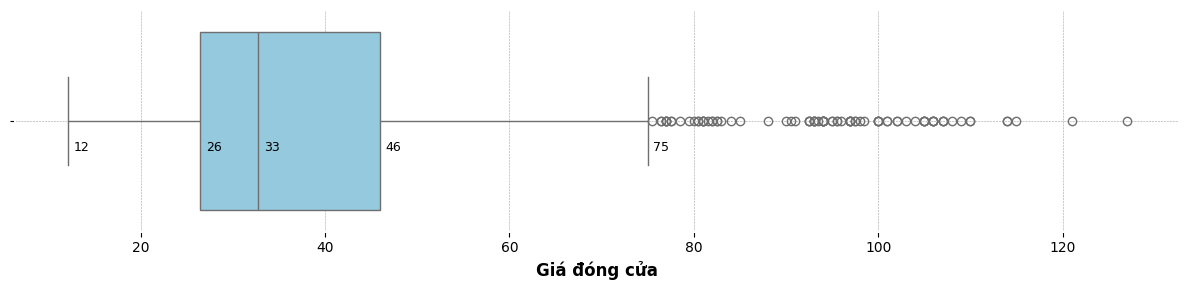

In [51]:

q1 = df_raw['GiaDongCua'].quantile(0.25)
median = df_raw['GiaDongCua'].median()
q3 = df_raw['GiaDongCua'].quantile(0.75)
iqr = q3 - q1
whisker_low = df_raw['GiaDongCua'][df_raw['GiaDongCua'] >= (q1 - 1.5 * iqr)].min()
whisker_high = df_raw['GiaDongCua'][df_raw['GiaDongCua'] <= (q3 + 1.5 * iqr)].max()

plt.figure(figsize=(12, 3))
sns.boxplot(x=df_raw['GiaDongCua'], color="skyblue")
plt.xlabel('Giá đóng cửa')
plt.grid(True)

for val in [whisker_low, q1, median, q3, whisker_high]:
    plt.text(val+1.5, 0.15, f'{val:.0f}', ha='center', va='bottom', fontsize=9, color='black')

plt.tight_layout()
plt.show()


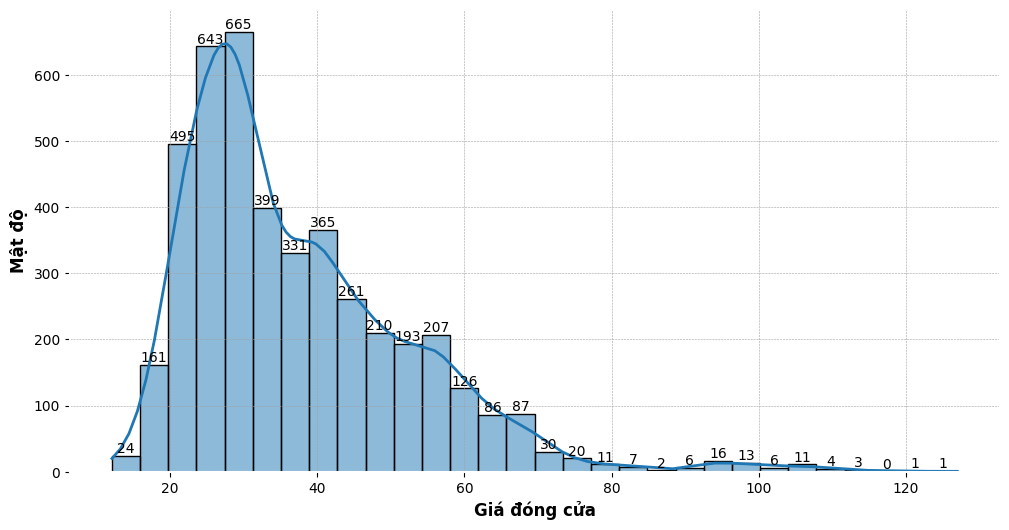

In [38]:
plt.figure(figsize=(12, 6))

sns.histplot(
    data=df_raw,
    x='GiaDongCua',
    kde=True,
    stat='count',
    legend=False,
    bins=30
)

for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2, p.get_height(), 
             f'{p.get_height()}' if p.get_height() != 0 else '0',
             ha='center', va='bottom', fontsize=10, color='black')


plt.xlabel('Giá đóng cửa')
plt.ylabel('Mật độ')
plt.show()

Biểu đồ xu hướng giá đóng cửa với đường trung bình động

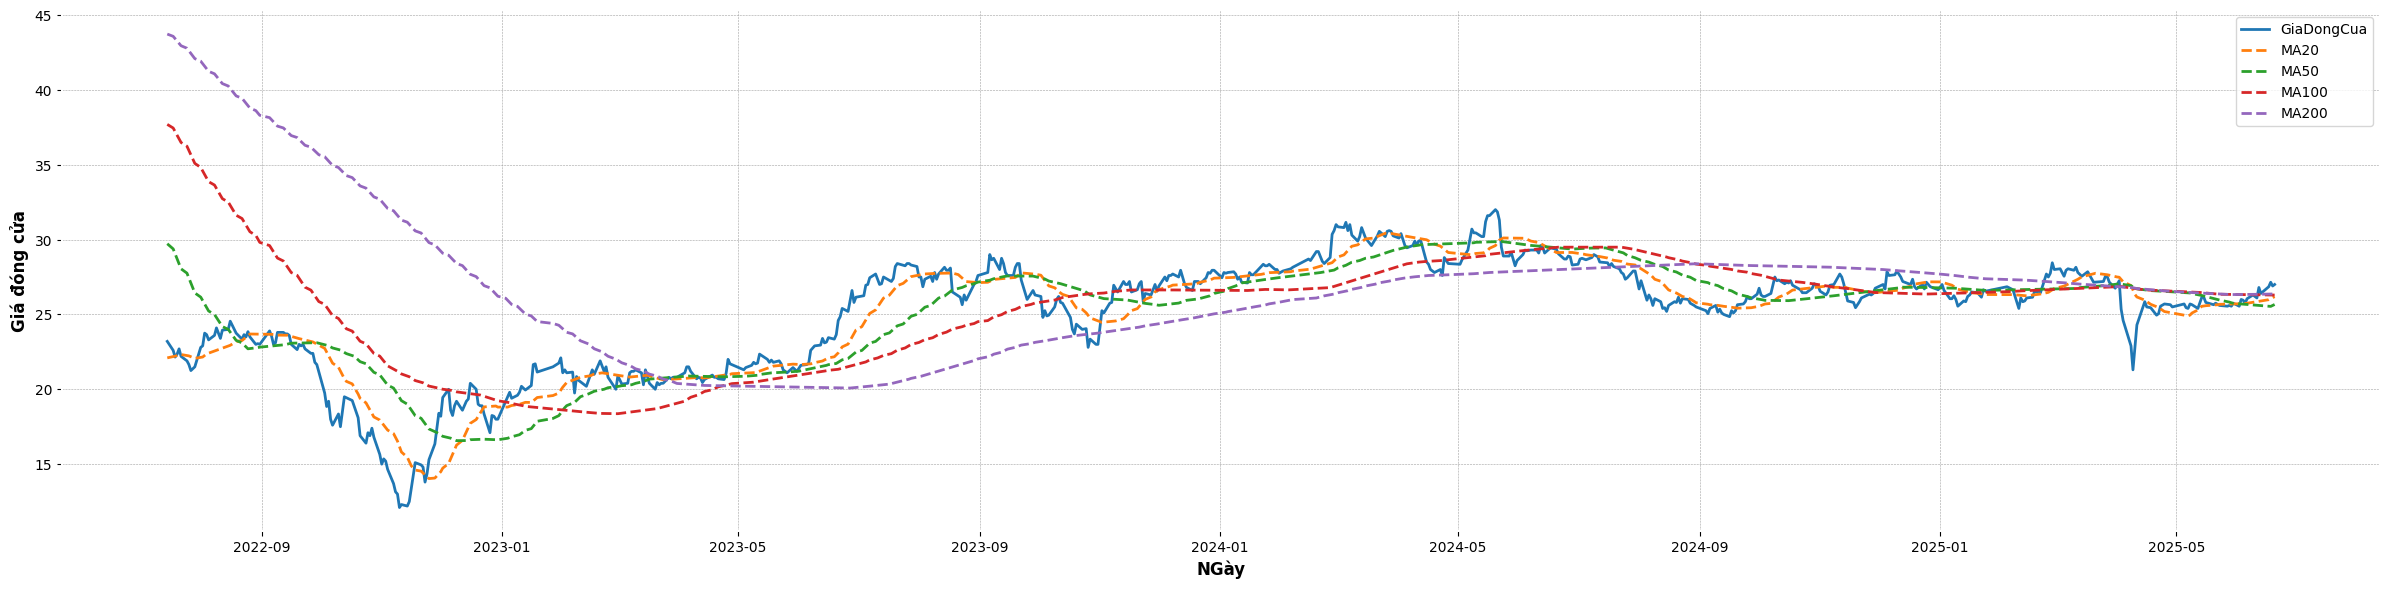

In [46]:
def moving_average(data, window):
    return data.rolling(window=window).mean()

df_temp = df_raw.copy() 

df_temp['MA20'] = moving_average(df_temp['GiaDongCua'], 20)
df_temp['MA50'] = moving_average(df_temp['GiaDongCua'], 50)
df_temp['MA100'] = moving_average(df_temp['GiaDongCua'], 100)
df_temp['MA200'] = moving_average(df_temp['GiaDongCua'], 200)

df_temp = df_temp[-365*2:]

plt.figure(figsize=(24, 6))
plt.plot(df_temp.index, df_temp['GiaDongCua'], label='GiaDongCua', linestyle='-')
plt.plot(df_temp.index, df_temp['MA20'], label='MA20', linestyle='--')
plt.plot(df_temp.index, df_temp['MA50'], label='MA50', linestyle='--')
plt.plot(df_temp.index, df_temp['MA100'], label='MA100', linestyle='--')
plt.plot(df_temp.index, df_temp['MA200'], label='MA200', linestyle='--')
plt.xlabel('NGày')
plt.ylabel('Giá đóng cửa')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

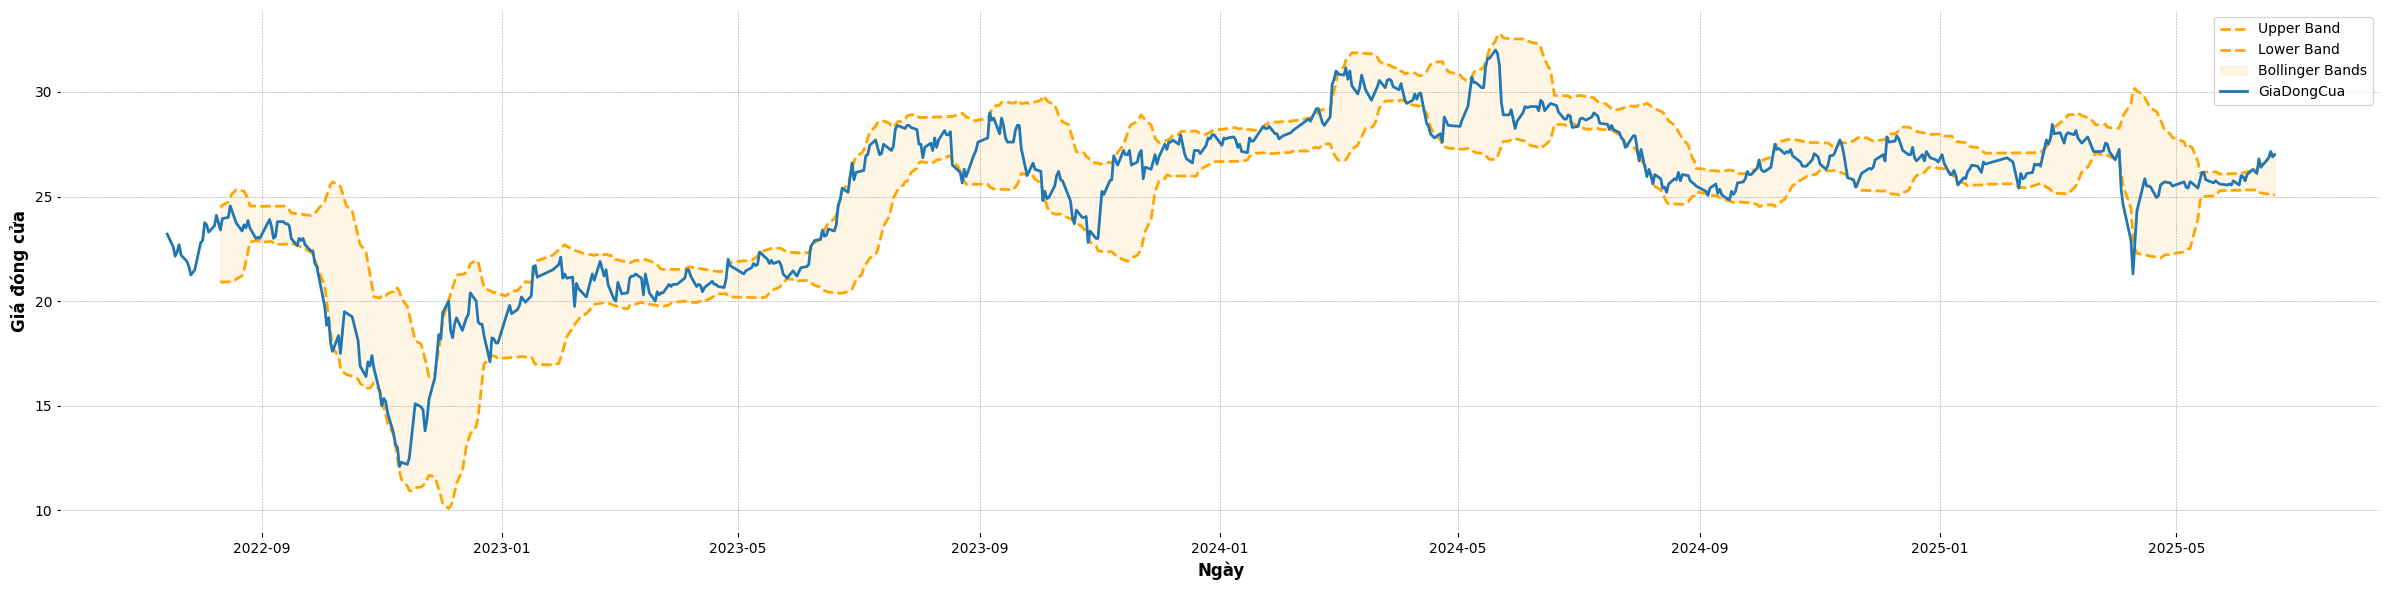

In [42]:
# bollinger band, upper and lower band with closing price
def bollinger_bands(data, window=20, num_std=2):
    ma = moving_average(data, window)
    rolling_std = data.rolling(window=window).std()
    upper_band = ma + (rolling_std * num_std)
    lower_band = ma - (rolling_std * num_std)
    return upper_band, lower_band

df_temp_2 = df_raw[-365*2:].copy()

upper_band, lower_band = bollinger_bands(df_temp_2['GiaDongCua'], window=20, num_std=2)



plt.figure(figsize=(24, 6))
plt.plot(df_temp_2.index, upper_band, label='Upper Band', linestyle='--', color='orange')
plt.plot(df_temp_2.index, lower_band, label='Lower Band', linestyle='--', color='orange')
plt.fill_between(df_temp_2.index, upper_band, lower_band, color='orange', alpha=0.1, label='Bollinger Bands')
plt.plot(df_temp_2.index, df_temp_2['GiaDongCua'], label='GiaDongCua', linestyle='-')
plt.xlabel('Ngày')
plt.ylabel('Giá đóng cửa')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

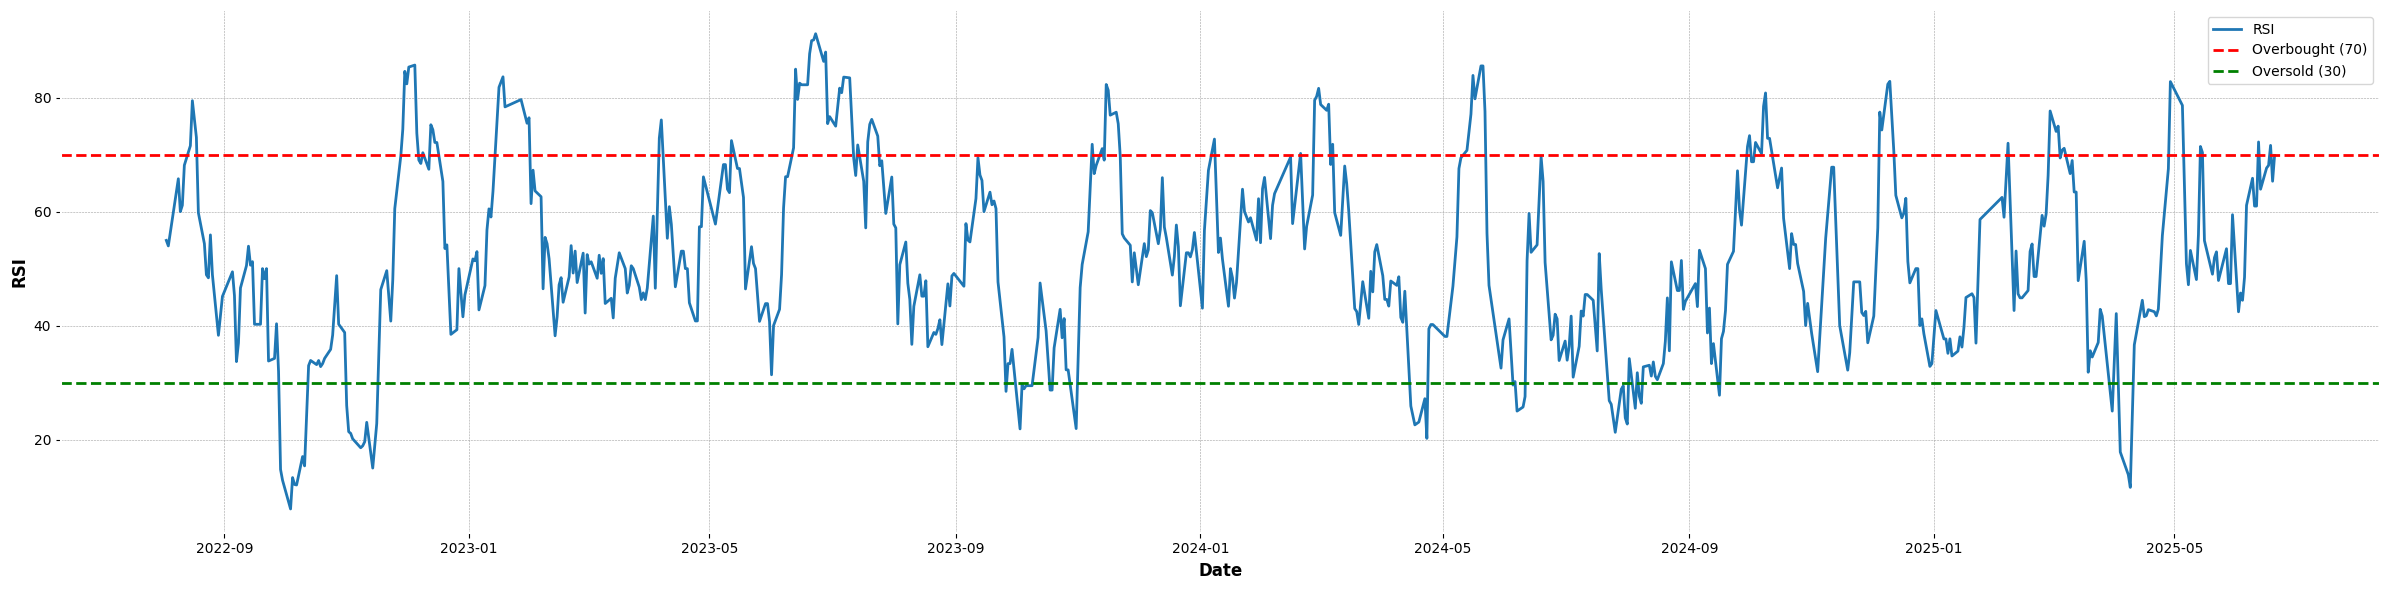

In [43]:
# RSI
def rsi(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

df_temp_3 = df_raw[-365*2:].copy()

df_temp_3['RSI'] = rsi(df_temp_3['GiaDongCua'], window=14)
plt.figure(figsize=(24, 6))
plt.plot(df_temp_3.index, df_temp_3['RSI'], label='RSI', linestyle='-')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

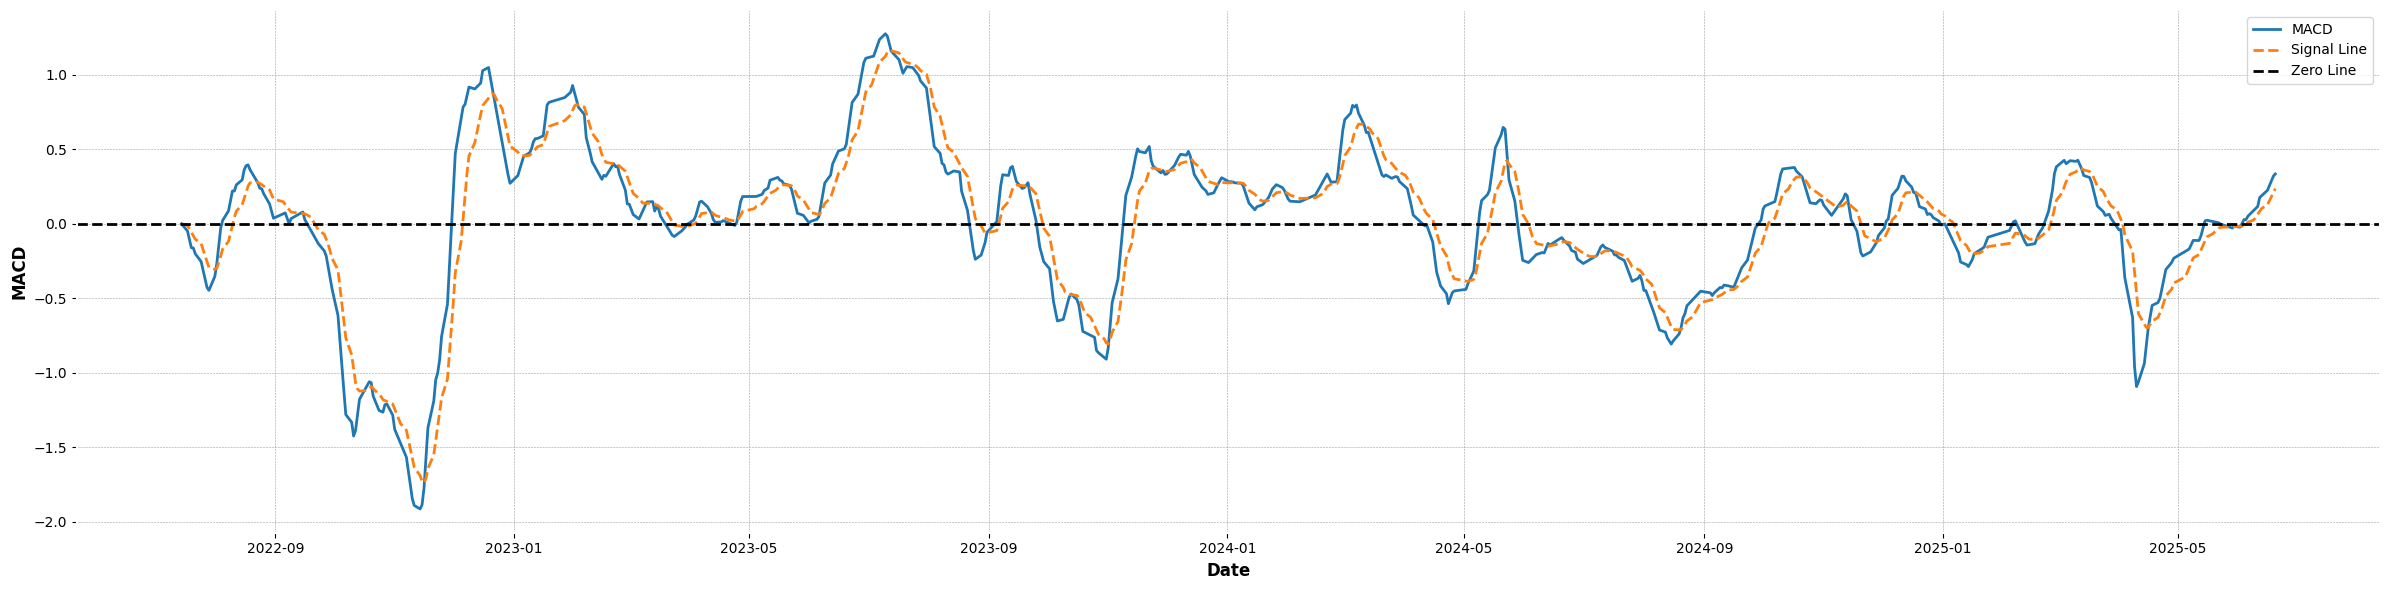

In [44]:
# MACD
def macd(data, short_window=12, long_window=26, signal_window=9):
    short_ema = data.ewm(span=short_window, adjust=False).mean()
    long_ema = data.ewm(span=long_window, adjust=False).mean()
    macd_line = short_ema - long_ema
    signal_line = macd_line.ewm(span=signal_window, adjust=False).mean()
    return macd_line, signal_line

df_temp_3['MACD'], df_temp_3['Signal_Line'] = macd(df_temp_3['GiaDongCua'])
plt.figure(figsize=(24, 6))
plt.plot(df_temp_3.index, df_temp_3['MACD'], label='MACD', linestyle='-')
plt.plot(df_temp_3.index, df_temp_3['Signal_Line'], label='Signal Line', linestyle='--')
plt.axhline(0, color='black', linestyle='--', label='Zero Line')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()